# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | bonavista
Processing Record 4 of Set 1 | manjacaze
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | morehead
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | verkhnetulomskiy
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | san vicente
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | husavik
Processing Record 23 of Set 1 | bia

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,300.50,78,90,8.05,MV,1667854650
1,avarua,-21.2078,-159.7750,297.18,78,100,2.57,CK,1667854651
2,bonavista,48.6499,-53.1147,284.36,95,100,6.76,CA,1667854651
3,manjacaze,-24.7117,33.8828,295.49,89,32,2.23,MZ,1667854651
4,cidreira,-30.1811,-50.2056,290.47,79,16,6.49,BR,1667854432


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

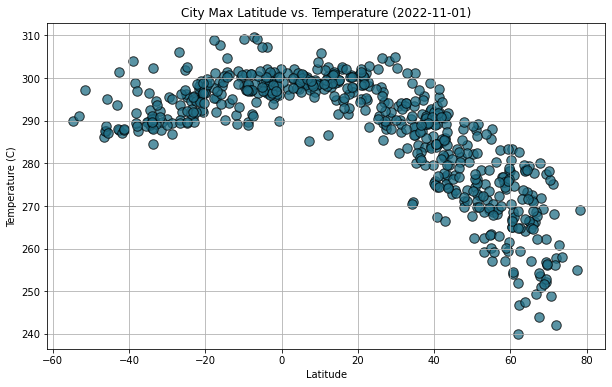

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

<Figure size 432x288 with 0 Axes>

In [7]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

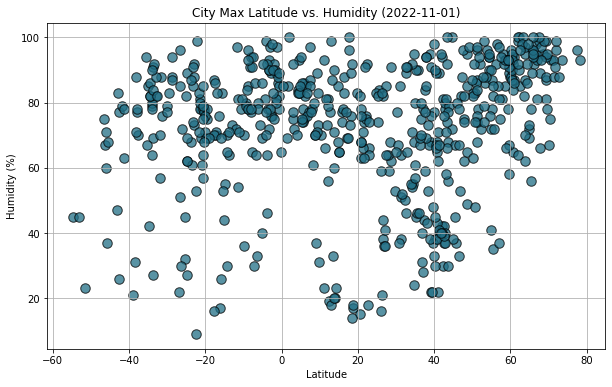

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

<Figure size 432x288 with 0 Axes>

In [8]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-11-01)')
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

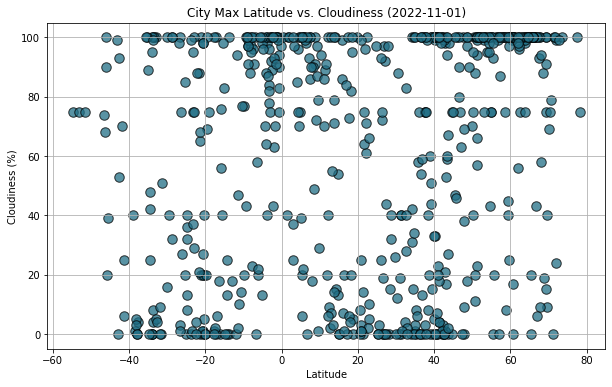

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

<Figure size 432x288 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

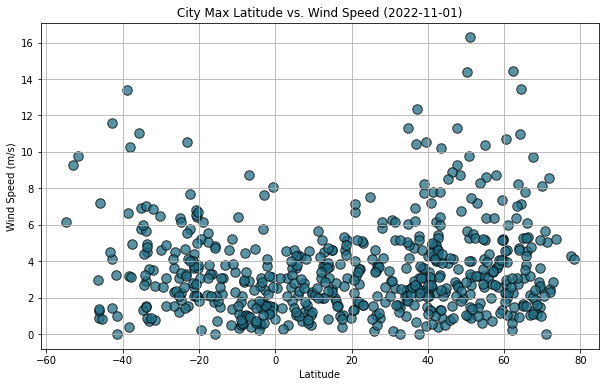

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

<Figure size 432x288 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,bonavista,48.6499,-53.1147,284.36,95,100,6.76,CA,1667854651
5,chokurdakh,70.6333,147.9167,248.89,93,79,5.66,RU,1667854652
6,albany,42.6001,-73.9662,290.67,37,0,5.42,US,1667854233
9,morehead,37.2711,-87.1764,295.90,44,100,2.57,US,1667854653
10,butaritari,3.0707,172.7902,299.83,75,25,3.05,KI,1667854653


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,300.50,78,90,8.05,MV,1667854650
1,avarua,-21.2078,-159.7750,297.18,78,100,2.57,CK,1667854651
3,manjacaze,-24.7117,33.8828,295.49,89,32,2.23,MZ,1667854651
4,cidreira,-30.1811,-50.2056,290.47,79,16,6.49,BR,1667854432
7,rikitea,-23.1203,-134.9692,295.89,92,100,10.56,PF,1667854652


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7258792323058515


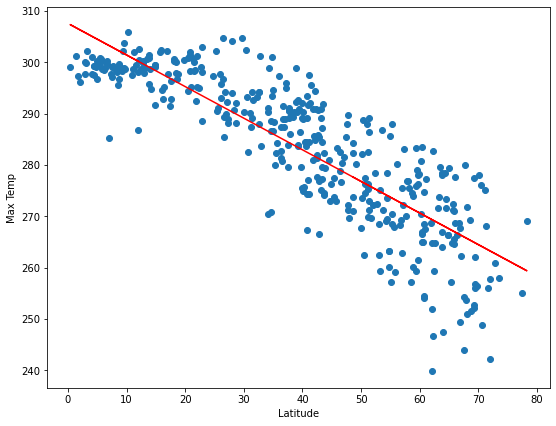

In [13]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.31468205396416965


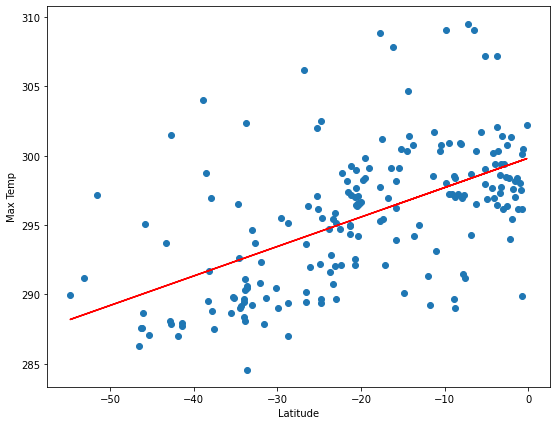

In [14]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.07960954901392826


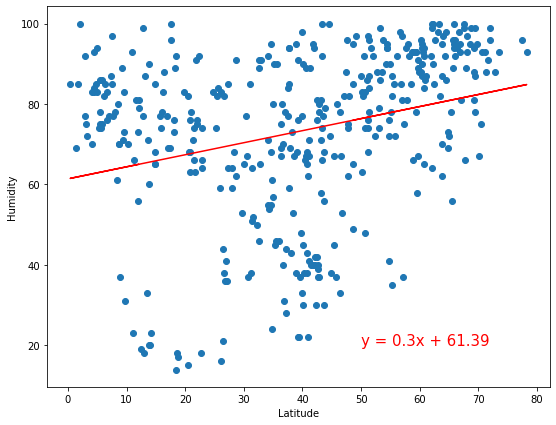

In [15]:
# Northern Hemisphere
# Linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.06622132651711456


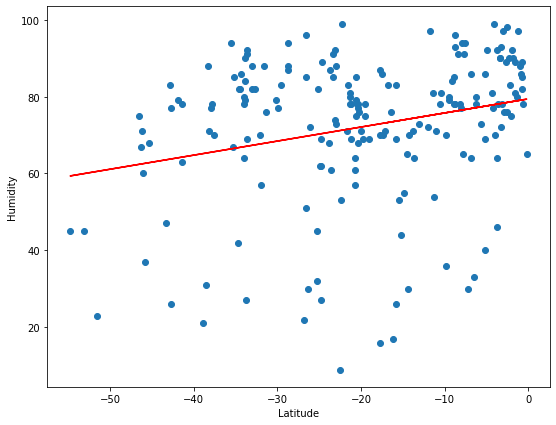

In [19]:
# Southern Hemisphere
# Linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.05195405880090236


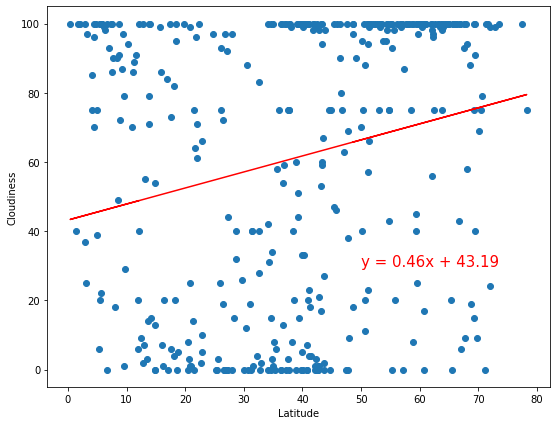

In [17]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.08487686464834254


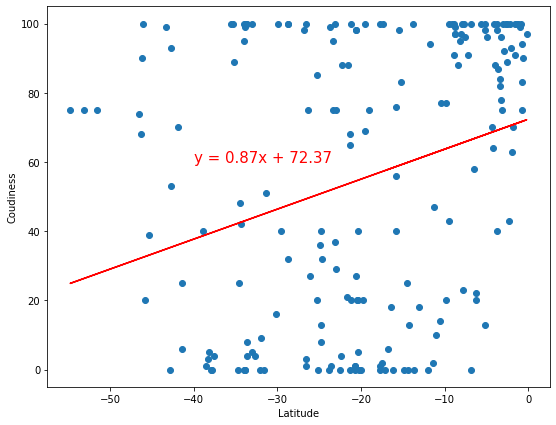

In [18]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Coudiness')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.03964334225006745


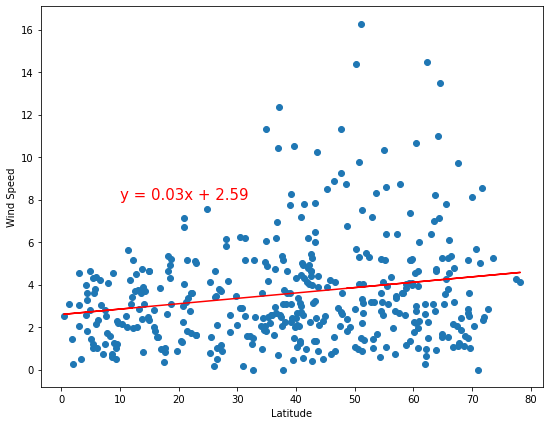

In [20]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.12124641056065188


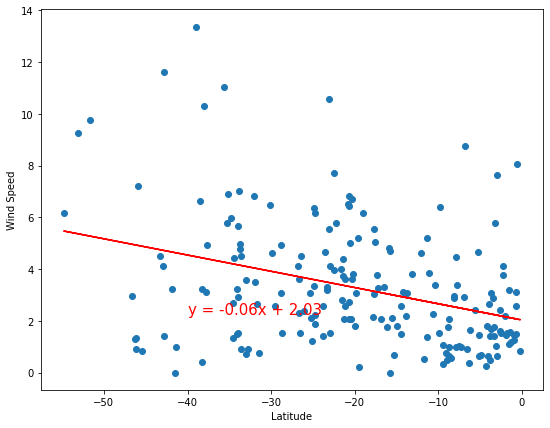

In [21]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,2.25),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE